# Bootcamp by Pieran Data #

This following project was done for the course 'Python for Data Science and Machine Learning Bootcamp'.
Here showcasing my personal interpretation of the project following the structure of the exercise proposed by the course.
While the main section of the Notebook follows the exrcise proposed at the end I make some extra evaluation of the data, steering away from the simple answering questions.

Michele Del Zoppo
6/11/2020

# Finance Data Project 

In this data project I focused on exploratory data analysis of stock prices. Keep in mind, this project wass just meant to practice my visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
Let's check bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from ~Google finance~ **Tiingo, IEX & Yahoo finance** using pandas!

*Note: [You'll need to install pandas-datareader for this to work (for IEX & Tiingo)!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.
[To use Yahoo Finance, which was deprecated from datareader you need to intall the yfinance library instead](https://pypi.org/project/yfinance/).*

In [20]:
import pandas as pd #this is sucha a normality
import numpy as np #nothing can be done without it
import os #must use to set the API Key for both IEX and Tiingo, Yahoo doesn't requires one for the free quota
from datetime import datetime #used to set times for extractions
import matplotlib.pyplot as plt #plotting stuff
import matplotlib as mpl #plotting more stuff

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. ~Use google finance as a source, for example.~
Google Finance was deprecated from pandas datareader and I used Tiingo instead for the data gathering initially, I added IEX format and Yhaoo Finance as well later on, but the dataframe structure you will see is based on the data from Tiingo.
I used a personal API KEY, which I will not post due to privacy. Included a csv of the data collected instead, and just kept the Tiingo API KEY variable as reference.
If you want to use the same process please subscribe to Tiingo or IEX here: [IEX, use Edge to access! Chrome doesn't really like it...](https://iexcloud.io/) - [Tiingo, dark background, I already love them!](https://www.tiingo.com/) (for US stock data I would suggest Tiingo, IEX is counting each datapoint for your daily usage while Tiingo only the actual tick & request time, but IEX has more markets, while Tiingo is still limited to China and US).
**
  

In [8]:
tickers=['BAC','C', 'GS','JPM','MS','WFC'] # the tickers of the banks we will check for this project

### IEX data gathering


In [9]:
import pandas_datareader.data as web #calls what we need from pandas-datareader for IEX

os.environ["IEX_API_KEY"] = 'INSER_YOUR_KEY_HERE'
start = datetime(2020, 6, 1) #set start of the data request
end = datetime(2020, 6, 1) #set end of the data request
bac = web.DataReader('BAC', 'iex', start, end) #grabs the data
bac #check the head of the new df created from the data collected
#add more tickers as you go along... you can make a for loop to load all the tickers from the list I created initially!

,open,high,low,close,volume
date,,,,,
2020-06-01,24.28,24.87,24.05,24.61,58470225


### Yahoo Finance gathering

In [16]:
import yfinance as yf #as mentioned for Yahoo finance we need another library
import time # usseful when needed to sleep between tickers download to avoid reaching the max quota for free account

msft = yf.Ticker("MSFT") # get stock info from tick name, example is microsoft
print(msft.info) #let's see how the import looks
hist = msft.history(period="1y") #get historical market data and save it as dataframe set for 1 year of data
# time.sleep(1) #it is adviced to use it so Yahoo doesn't ban your IP before each Ticker download
#add more tickers as you go along... you can make a for loop to load all the tickers from the list I created initially!

{'zip': '98052', 'sector': 'Technology', 'fullTimeEmployees': 144000, 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, and OneDrive; LinkedIn that includes Talent and marketing solutions, and subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also provides support services and Microsoft consulting services to assist customers in d

In [17]:
hist.head() # let's check the dataframe with the historical data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-06-12,129.80,130.37,129.12,129.89,17084700,0.0,0
2019-06-13,130.38,131.38,129.96,130.71,17200800,0.0,0
2019-06-14,130.65,132.16,130.04,130.84,17821700,0.0,0
2019-06-17,131.02,132.10,130.92,131.24,14517800,0.0,0
2019-06-18,132.56,133.60,131.95,133.52,25934500,0.0,0


Text(2020-03-20, 130, 'COVID-19!!!!!')

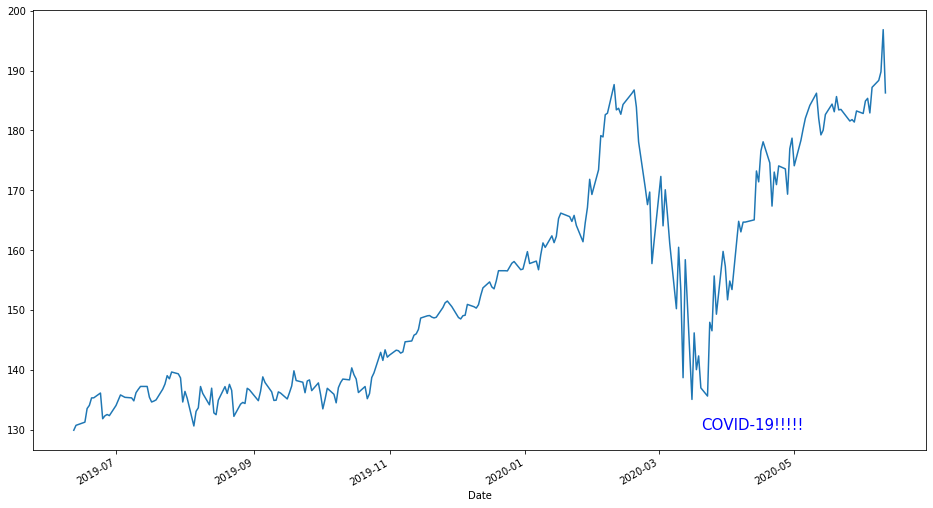

In [28]:
fig, ax = plt.subplots(figsize=(12, 4)) #set figure size and axes for plot+annotations
hist['Close'].plot(figsize=(16, 9), ax=ax) #let's check the historical data collected from Yahoo just to see if it worked...
ax.text('2020-03-20', 130, "COVID-19!!!!!", ha='left',size=15, color='blue') #add note about Covid-19 market HIT!

Ah! you can see pretty damn easily the Covid-19 market drop! Nice to see it Market recovered pretty nicely, even gaining from before the fall.

### Tiingo Data gathering

In [29]:
import pandas_datareader as pdr
os.environ["TIINGO_API_KEY"] = 'INSERT_YOUR_KEY_HERE' #THIS IS YOUR PERSONAL API KEY SO DO NOT SHARE!!!!!!!

In [33]:
tickers=['BAC','C', 'GS','JPM','MS','WFC'] #loaded earlier but just in case we forgot ;)
for i in tickers:
    globals()[i] = pdr.get_data_tiingo(i, start='1/1/2006', end='1/1/2016', api_key=os.getenv('TIINGO_API_KEY'))
    ;
 #for each ticker creates a dataframe with that stock prices for the start/end period you need for the project on Tiingo
BAC.head()

close   high    low   open    volume  \
symbol date                                                              
BAC    2006-01-03 00:00:00+00:00  47.08  47.18  46.15  46.92  16296700   
       2006-01-04 00:00:00+00:00  46.58  47.24  46.45  47.00  17757900   
       2006-01-05 00:00:00+00:00  46.64  46.83  46.32  46.58  14970700   
       2006-01-06 00:00:00+00:00  46.57  46.91  46.35  46.80  12599800   
       2006-01-09 00:00:00+00:00  46.60  46.97  46.36  46.72  15619400   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
BAC    2006-01-03 00:00:00+00:00  33.357489  33.428342  32.698558  33.244125   
       2006-01-04 00:00:00+00:00  33.003225  33.470853  32.911116  33.300807   
       2006-01-05 00:00:00+00:00  33.045737  33.180357  32.819008  33.003225   
       2006-01-06 00:00:00+00:00  32.996140  33.237039  32.840264  33.159101   
       2006-01-09 00:00:00+00:00  33.017396  33.279551  32.847349  33.102419   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
BAC    2006-01-03 00:00:00+00:00   16296700      0.0          1.0  
       2006-01-04 00:00:00+00:00   17757900      0.0          1.0  
       2006-01-05 00:00:00+00:00   14970700      0.0          1.0  
       2006-01-06 00:00:00+00:00   12599800      0.0          1.0  
       2006-01-09 00:00:00+00:00   15619400      0.0          1.0

**Let's iterate thru the list of dataframes just created for each ticker and drop the first level which we do not need for this project.
Tiingo saves the data with the Ticker name as first INDEX level.**

In [34]:
for df in tickers:
    globals()[df] = vars()[df].droplevel(level=0)
    ;
#iterate in each dataframe and drops the first index level, index from Tiingo data is not really needed, and this format match the mos uses format in the industry.

In [35]:
WFC.head() #new cleaned up dataframe without the first index level

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2006-01-03 00:00:00+00:00,63.80,63.95,62.39,63.20,5508200,20.856866,20.905903,20.395923,20.660720,11016400,0.0,1.0
2006-01-04 00:00:00+00:00,63.06,63.64,62.73,63.60,5435000,20.614953,20.804561,20.507072,20.791484,10870000,0.0,1.0
2006-01-05 00:00:00+00:00,62.99,63.11,62.62,63.00,5079000,20.592069,20.631298,20.471112,20.595338,10158000,0.0,1.0
2006-01-06 00:00:00+00:00,63.36,63.55,62.77,63.16,4201900,20.713026,20.775139,20.520149,20.647644,8403800,0.0,1.0
2006-01-09 00:00:00+00:00,63.35,63.65,63.11,63.35,2809800,20.709757,20.807830,20.631298,20.709757,5619600,0.0,1.0


**Used pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.**

In [46]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers) #first list is calling the df names we created initially so do not use the '' around them!
bank_stocks.head()

BAC                                            \
                           close   high    low   open    volume   adjClose   
date                                                                         
2006-01-03 00:00:00+00:00  47.08  47.18  46.15  46.92  16296700  33.357489   
2006-01-04 00:00:00+00:00  46.58  47.24  46.45  47.00  17757900  33.003225   
2006-01-05 00:00:00+00:00  46.64  46.83  46.32  46.58  14970700  33.045737   
2006-01-06 00:00:00+00:00  46.57  46.91  46.35  46.80  12599800  32.996140   
2006-01-09 00:00:00+00:00  46.60  46.97  46.36  46.72  15619400  33.017396   

                                                                      ...  \
                             adjHigh     adjLow    adjOpen adjVolume  ...   
date                                                                  ...   
2006-01-03 00:00:00+00:00  33.428342  32.698558  33.244125  16296700  ...   
2006-01-04 00:00:00+00:00  33.470853  32.911116  33.300807  17757900  ...   
2006-01-05 00:00:00+00:00  33.180357  32.819008  33.003225  14970700  ...   
2006-01-06 00:00:00+00:00  33.237039  32.840264  33.159101  12599800  ...   
2006-01-09 00:00:00+00:00  33.279551  32.847349  33.102419  15619400  ...   

                             WFC                                        \
                             low   open   volume   adjClose    adjHigh   
date                                                                     
2006-01-03 00:00:00+00:00  62.39  63.20  5508200  20.856866  20.905903   
2006-01-04 00:00:00+00:00  62.73  63.60  5435000  20.614953  20.804561   
2006-01-05 00:00:00+00:00  62.62  63.00  5079000  20.592069  20.631298   
2006-01-06 00:00:00+00:00  62.77  63.16  4201900  20.713026  20.775139   
2006-01-09 00:00:00+00:00  63.11  63.35  2809800  20.709757  20.807830   

                                                                               
                              adjLow    adjOpen adjVolume divCash splitFactor  
date                                                                           
2006-01-03 00:00:00+00:00  20.395923  20.660720  11016400     0.0         1.0  
2006-01-04 00:00:00+00:00  20.507072  20.791484  10870000     0.0         1.0  
2006-01-05 00:00:00+00:00  20.471112  20.595338  10158000     0.0         1.0  
2006-01-06 00:00:00+00:00  20.520149  20.647644   8403800     0.0         1.0  
2006-01-09 00:00:00+00:00  20.631298  20.709757   5619600     0.0         1.0  

[5 rows x 72 columns]

**Setting the column name levels, so it is easier to read.**

In [47]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker                  BAC                                            \
Stock Info                 close   high    low   open    volume   adjClose   
date                                                                         
2006-01-03 00:00:00+00:00  47.08  47.18  46.15  46.92  16296700  33.357489   
2006-01-04 00:00:00+00:00  46.58  47.24  46.45  47.00  17757900  33.003225   
2006-01-05 00:00:00+00:00  46.64  46.83  46.32  46.58  14970700  33.045737   
2006-01-06 00:00:00+00:00  46.57  46.91  46.35  46.80  12599800  32.996140   
2006-01-09 00:00:00+00:00  46.60  46.97  46.36  46.72  15619400  33.017396   

Bank Ticker                                                           ...  \
Stock Info                   adjHigh     adjLow    adjOpen adjVolume  ...   
date                                                                  ...   
2006-01-03 00:00:00+00:00  33.428342  32.698558  33.244125  16296700  ...   
2006-01-04 00:00:00+00:00  33.470853  32.911116  33.300807  17757900  ...   
2006-01-05 00:00:00+00:00  33.180357  32.819008  33.003225  14970700  ...   
2006-01-06 00:00:00+00:00  33.237039  32.840264  33.159101  12599800  ...   
2006-01-09 00:00:00+00:00  33.279551  32.847349  33.102419  15619400  ...   

Bank Ticker                  WFC                                        \
Stock Info                   low   open   volume   adjClose    adjHigh   
date                                                                     
2006-01-03 00:00:00+00:00  62.39  63.20  5508200  20.856866  20.905903   
2006-01-04 00:00:00+00:00  62.73  63.60  5435000  20.614953  20.804561   
2006-01-05 00:00:00+00:00  62.62  63.00  5079000  20.592069  20.631298   
2006-01-06 00:00:00+00:00  62.77  63.16  4201900  20.713026  20.775139   
2006-01-09 00:00:00+00:00  63.11  63.35  2809800  20.709757  20.807830   

Bank Ticker                                                                    
Stock Info                    adjLow    adjOpen adjVolume divCash splitFactor  
date                                                                           
2006-01-03 00:00:00+00:00  20.395923  20.660720  11016400     0.0         1.0  
2006-01-04 00:00:00+00:00  20.507072  20.791484  10870000     0.0         1.0  
2006-01-05 00:00:00+00:00  20.471112  20.595338  10158000     0.0         1.0  
2006-01-06 00:00:00+00:00  20.520149  20.647644   8403800     0.0         1.0  
2006-01-09 00:00:00+00:00  20.631298  20.709757   5619600     0.0         1.0  

[5 rows x 72 columns]

##### Let's save the data in CSV so can be easily shared on GitHub!
**For whoever is going to use the csv please jump all above passages and just do:**

       bank_stock=pd.read_csv('bank_stocks.csv',index_col ='Type')


In [78]:
bank_stocks.to_csv('bank_stocks.csv') #saving as a simple csv file! Be careful is MULTI-INDEX!!!!

In [81]:
bank_csv=pd.read_csv('bank_stocks.csv', header=[0,1], index_col=0)#reads the csv as needed, for EDA using the original df from data gathering
bank_csv.head()

## EDA - Exploratory Data Analysis

*The following code is using the original df created after gathering the data from Tiingo, so if you are using the csv please change bank_stock with bank_csv*

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

**What is the max Close price for each bank's stock throughout the time period?**

In [85]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').max() #slice the dataframe to only the close columns and show max for each ticker

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. 
Returns are defined by the following formula:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [83]:
returns = pd.DataFrame() # set empty dataframe to fill with returns

**We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [84]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['close'].pct_change() #save column name with the added Return string
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
date,,,,,,
2006-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 00:00:00+00:00,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05 00:00:00+00:00,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06 00:00:00+00:00,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09 00:00:00+00:00,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

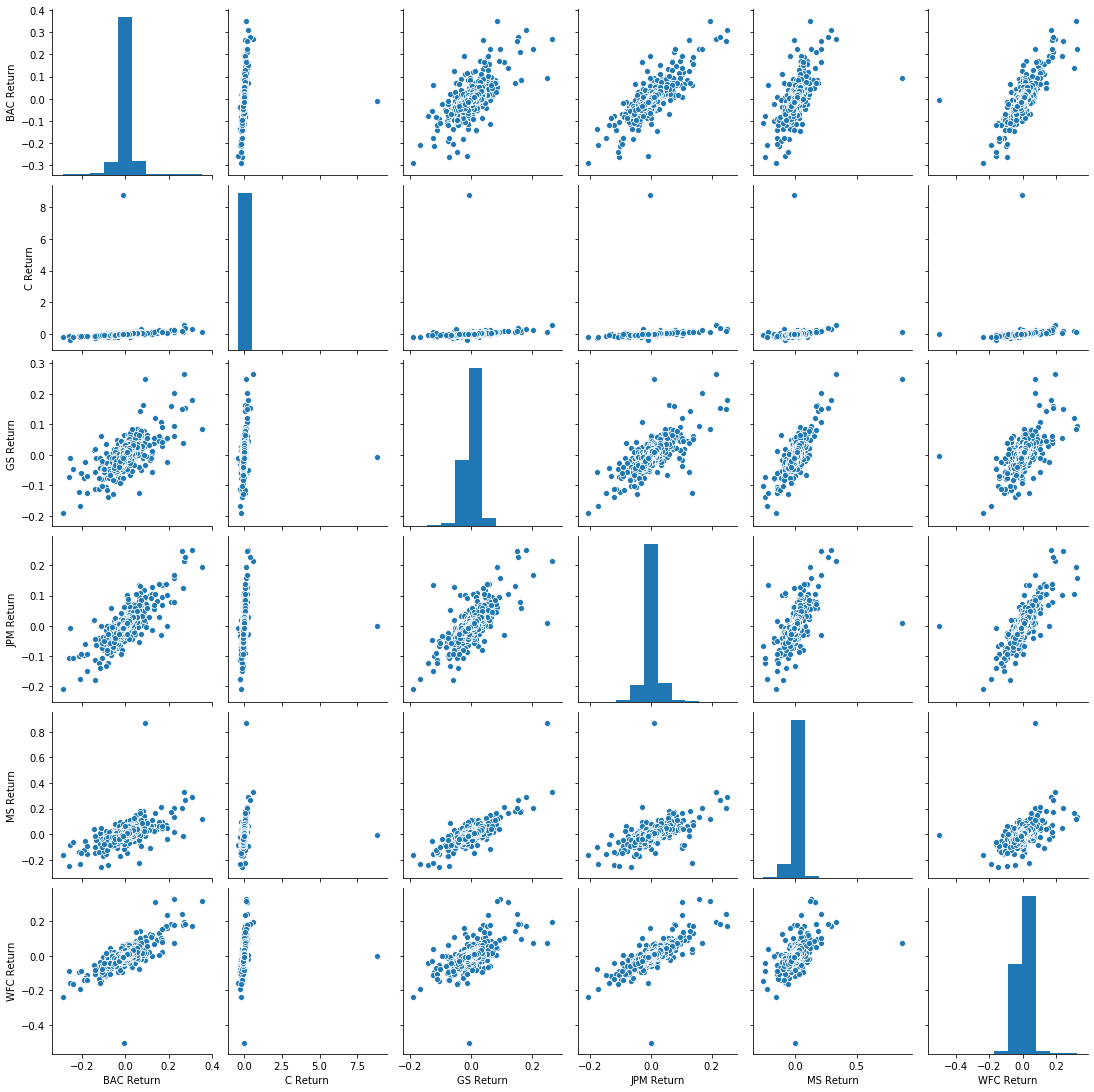

In [88]:
import seaborn as sns #let's start plotting some more advanced stuff
sns.pairplot(returns[1:]) #jump first row which contains NaN values because first line for calculating returns

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

You'll also see the enormous crash in value if you take a look a the stock price plot (which we do later in the visualizations.)

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [39]:
returns.idxmin() #biggest drop in price

BAC Return   2009-01-20 00:00:00+00:00
C Return     2009-02-27 00:00:00+00:00
GS Return    2009-01-20 00:00:00+00:00
JPM Return   2009-01-20 00:00:00+00:00
MS Return    2008-10-09 00:00:00+00:00
WFC Return   2006-08-14 00:00:00+00:00
dtype: datetime64[ns, UTC]

**You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, to know more see below:**
[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

In [40]:
returns.idxmax() #biggest gains

BAC Return   2009-04-09 00:00:00+00:00
C Return     2011-05-09 00:00:00+00:00
GS Return    2008-11-24 00:00:00+00:00
JPM Return   2009-01-21 00:00:00+00:00
MS Return    2008-10-13 00:00:00+00:00
WFC Return   2008-07-16 00:00:00+00:00
dtype: datetime64[ns, UTC]

**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [48]:
returns.std() #high std means high voltatility, showing the full dataset

BAC Return    0.036617
C Return      0.179065
GS Return     0.025357
JPM Return    0.027651
MS Return     0.037831
WFC Return    0.031841
dtype: float64

In [49]:
returns.loc['2015-01-01':'2015-12-12'].std() #high std means high voltatility, showing only for 2015

BAC Return    0.016046
C Return      0.015220
GS Return     0.013777
JPM Return    0.013914
MS Return     0.016037
WFC Return    0.012467
dtype: float64

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

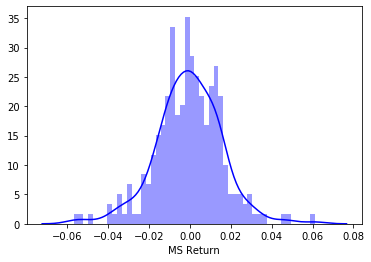

In [55]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='blue', bins=50)

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

*LOOK AT THE SCALE DIFFERENCE!*

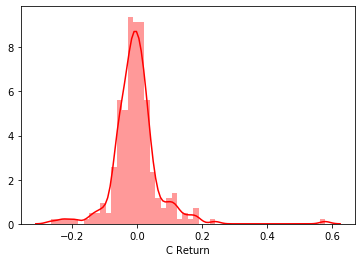

In [57]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=50)

____
# More Visualization

##### Unfortunately most of the following plots cannot be viewed in a Jupyter Notebook environment without running the code first.

This is the more personalized section and I freely choose to use plotly+cufflinks to creaete interactive plots that can be saved as html and embedded on a webpage, which you can see them here on my personal website:

[https://sites.google.com/view/geo-michele/home](https://sites.google.com/view/geo-michele/home)


In [90]:
sns.set_style('whitegrid') #changing the scale to better track values

# Optional Plotly Method Imports
import plotly as py
import plotly.express as px
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

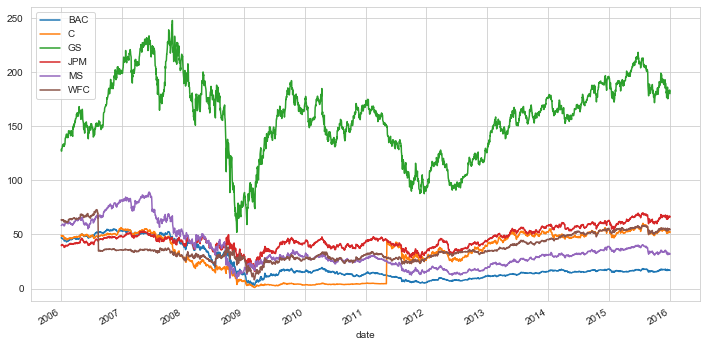

In [96]:
for tick in tickers:
    bank_stocks[tick]['close'].plot(label=tick,figsize=(12,6))#plot each bank stock close price, and assing a label to each based on their ticker name
    plt.legend()#FOR MODE

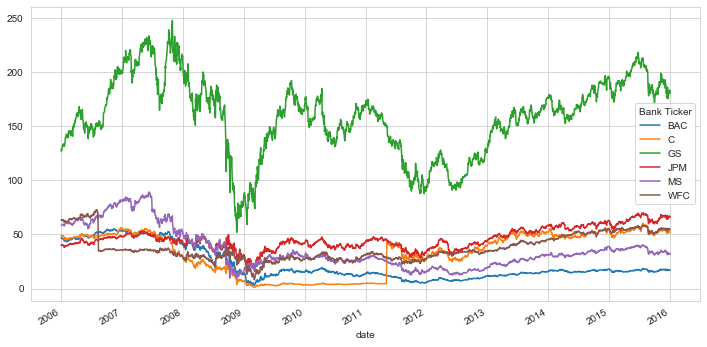

In [95]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').plot(figsize=(12,6))#another method to plot all using xs instead of a foor loop

In [98]:
margin=dict(l=20, r=20, t=50, b=20)#set the margin of the plot
fig=bank_stocks.xs(key='close',axis=1,level='Stock Info').iplot(asFigure=True)#doing the same thing but in plotly, making it interactive
py.offline.plot(fig, filename='BanksLines.html')#saves the file as html

'BanksLines.html'

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

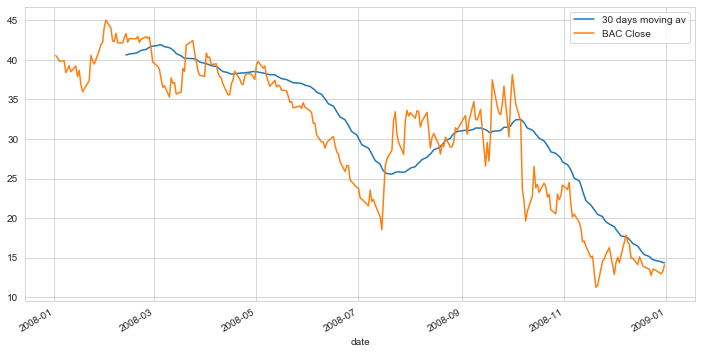

In [100]:
plt.figure(figsize=(12,6))
#calcualte moving average for the rolling window value
BAC['2008-01-01':'2008-12-31']['close'].rolling(window=30).mean().plot(label='30 days moving av') #plotting using pandas-buildin plots
BAC['2008-01-01':'2008-12-31']['close'].plot(label='BAC Close') #plotting using pandas-buildin plots
plt.legend() #adding legend

**Create a heatmap of the correlation between the stocks Close Price.**

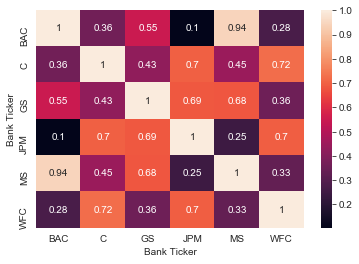

In [102]:
sns.heatmap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(), annot=True) #create heatmap of the correlation matrix for all tickers in the retun dataframe

**Optional: Use seaborn's clustermap to cluster the correlations together:**

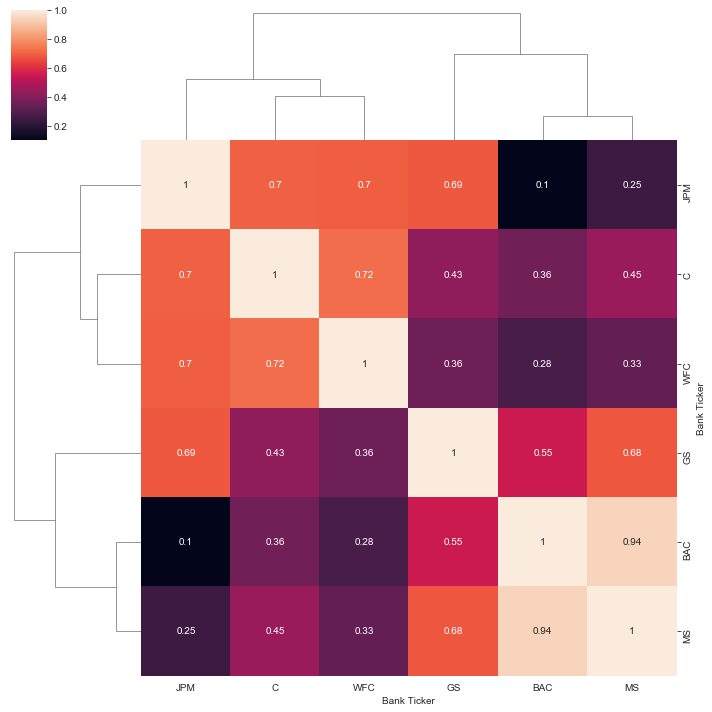

In [103]:
sns.clustermap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(), annot=True)

In [105]:
margin=dict(l=20, r=20, t=50, b=20)
close_corr = bank_stocks.xs(key='close',axis=1,level='Stock Info').corr()
fig = close_corr.iplot(kind='heatmap', colorscale='rdylbu',asFigure=True)
py.offline.plot(fig, filename='BanksHeatMap.html')

'BanksHeatMap.html'

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [107]:
margin=dict(l=20, r=20, t=50, b=20)
bac15=BAC['2015-01-01':'2015-12-31'][['close','high','low','open']]
fig=bac15.iplot(kind='candle',asFigure=True)
py.offline.plot(fig, filename='candleBAC2015.html')

'candleBAC2015.html'

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [108]:
margin=dict(l=20, r=20, t=50, b=20)
fig = MS['2015-01-01':'2016-01-01']['close'].ta_plot(study='sma',periods=[13,21,55],asFigure=True)
py.offline.plot(fig, filename='smaMS2015.html')

'smaMS2015.html'

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [109]:
margin=dict(l=20, r=20, t=50, b=20)
fig1 = BAC['2015-01-01':'2016-01-01']['close'].ta_plot(study='boll',asFigure=True)
py.offline.plot(fig1, filename='BollingerBAC2015.html')

'BollingerBAC2015.html'

# Thanks for checking my project out!

A Big thanks as well to Jose Portilla for the course in Data Science and all that is helping me accomplish.